# Titanic dataset EDA

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Importing data and understanding the nature of variables

In [115]:
df1 = pd.read_csv('./train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Age,cabin and embarked have null values
| Age can be filled with mean values, and embaked with mode of the data
| Name, Ticket and passenger ID seem to be redundant in the study**

In [118]:
print(df1.Pclass.nunique(),df1.Embarked.nunique(),df1.Sex.nunique())

3 3 2


In [119]:
df1.Embarked.unique()
#print(df1.Ticket.tolist())

array(['S', 'C', 'Q', nan], dtype=object)

In [120]:
#df1[df1['Sex']=='male'].Age.mean() #30.72
#df1[df1['Sex']=='female'].Age.mean() #27.91

In [121]:
print(df1.Sex.value_counts(),'\n')
print(df1.Pclass.value_counts(),'\n')
print(df1.Embarked.value_counts(),'\n')

male      577
female    314
Name: Sex, dtype: int64 

3    491
1    216
2    184
Name: Pclass, dtype: int64 

S    644
C    168
Q     77
Name: Embarked, dtype: int64 



<AxesSubplot:xlabel='Sex'>

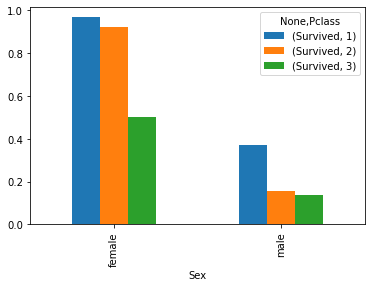

In [122]:
pd.pivot_table(df1,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.mean).plot(kind = 'bar')

**Females with cabin class 1 had very high chance sof survival and generally as the cabin class loweres the chance of survival also lower. Also over all survival chances of female is high.**

<AxesSubplot:xlabel='Embarked'>

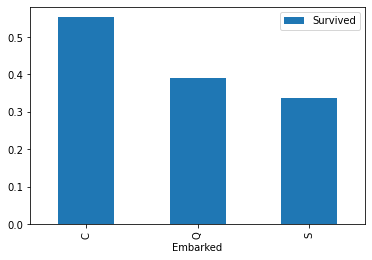

In [123]:
pd.pivot_table(df1,index=['Embarked'],values=['Survived'],aggfunc=np.mean).plot(kind = 'bar')

<AxesSubplot:ylabel='Count'>

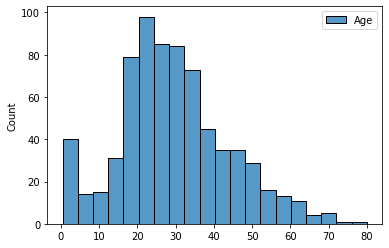

In [124]:
sns.histplot([df1.Age])

In [125]:
#segregating people based on age into 3 segments, ignoring null values for now
def age_seg(x):
    if x<10:
        return 0
    elif x>=10 and x<50:
        return 1
    elif x>50:
        return 2
    return 3
    

In [126]:
df1['age_seg'] = df1.Age.apply(age_seg)
df1['age_seg'].value_counts()

1    578
3    187
2     64
0     62
Name: age_seg, dtype: int64

<AxesSubplot:xlabel='age_seg'>

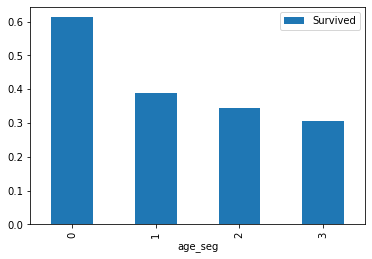

In [127]:
pd.pivot_table(df1,index=['age_seg'],values=['Survived'],aggfunc=np.mean).plot(kind = 'bar')

**As seen here lower age group children also had a higher chance of survival.**

<AxesSubplot:ylabel='Count'>

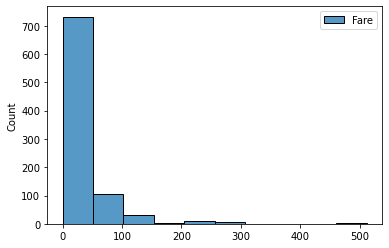

In [128]:
sns.histplot([df1.Fare], bins = 10)

In [129]:
#segregating people based on Fare into 3 segments
q1 = df1.Fare.quantile(0.33)
q2 = df1.Fare.quantile(0.66)
def fare_seg(x):
    if x<q1:
        return 0
    elif x>=q1 and x<q2:
        return 1
    elif x>=q2:
        return 2
    return 3

In [130]:
df1['fare_seg'] = df1.Fare.apply(fare_seg)
df1['fare_seg'].value_counts()

2    326
0    294
1    271
Name: fare_seg, dtype: int64

<AxesSubplot:xlabel='fare_seg'>

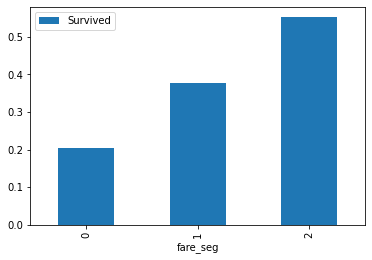

In [131]:
pd.pivot_table(df1,index=['fare_seg'],values=['Survived'],aggfunc='mean').plot(kind = 'bar')

**Again it can be seen people who payed more for the tickets had higher chances of survival (count here is similar in the 3 quantiles)**

In [132]:
df1[df1.Fare >= 400] #super high fare all survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_seg,fare_seg
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,2
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,2
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,2


<AxesSubplot:xlabel='Fare', ylabel='Count'>

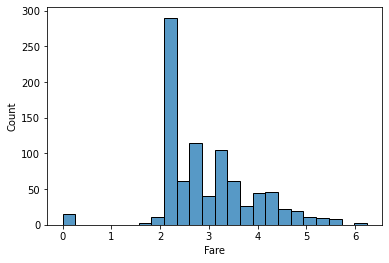

In [133]:
df1.Fare = np.log(df1.Fare+1)
sns.histplot(df1.Fare)

In [134]:
df1.drop(df1[df1.Fare >= 400].index, inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  age_seg      891 non-null    int64  
 13  fare_seg     891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 104.4+ KB


In [135]:
#cabin seems to be the ID of cabins a person booked, we can take the count from here as a reference
def cabins(x):
    if pd.isna(x):
        return 0
    else:
        return 1#len(x.split(' '))

In [136]:
df1['ncab'] = df1.Cabin.apply(cabins)
df1.ncab.value_counts()

0    687
1    204
Name: ncab, dtype: int64

<AxesSubplot:xlabel='ncab'>

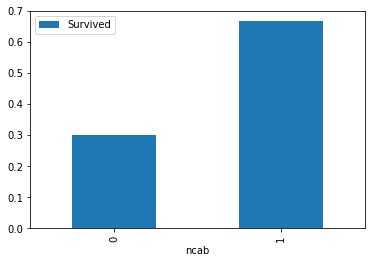

In [137]:
pd.pivot_table(df1,index=['ncab'],values=['Survived'],aggfunc='mean').plot(kind = 'bar')

**People who booked a cabin had higher chances of survival it seems**

In [138]:
pd.pivot_table(df1, index = ['ncab'], columns = ['fare_seg'], values = ['Survived'], aggfunc = 'mean')

Survived                    
fare_seg         0         1         2
ncab                                  
0         0.207018  0.344000  0.401316
1         0.111111  0.761905  0.683908

<AxesSubplot:>

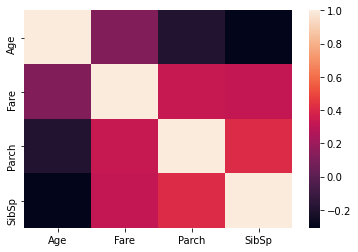

In [139]:
sns.heatmap(df1[['Age','Fare', 'Parch', 'SibSp']].corr())

### Data preprocessing for the model

In [140]:
df2 = pd.read_csv('./train.csv')
dft1 = pd.read_csv('./test.csv')

In [141]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

def preprocess(dfin):
    dfi = dfin.copy(deep = True)
    dfi.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
    dfi['Cabin'] = dfi.Cabin.apply(cabins)
    dfi.Age.fillna(dfi.Age.mean(), inplace = True)
    dfi.Embarked.replace({'S': 1, 'C':2, 'Q':3, np.nan:1}, inplace = True)
#    dfi.drop(dfi[dfi.Fare >= 400].index, inplace = True)
    dfi.Fare.fillna(dfi.Fare.median(), inplace = True)   ##fare missing in test set
    dfi.Fare = np.log(dfi.Fare + 1)
    dfi.dropna(axis = 0, inplace = True)
    dfi['Sex'] = dfi.Sex.apply(lambda x: 0 if x=='male' else 1)
    dfi[['Age','SibSp','Parch','Fare']] = scale.fit_transform(dfi[['Age','SibSp','Parch','Fare']])
    return dfi

In [142]:
df2 = preprocess(df2)

In [143]:
dft = preprocess(dft1)
dft.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,0.334993,-0.499470,-0.400248,-0.867031,0,3
1,3,1,1.325530,0.616992,-0.400248,-0.969149,0,1
2,2,0,2.514175,-0.499470,-0.400248,-0.669252,0,3
3,3,0,-0.259330,-0.499470,-0.400248,-0.773647,0,1
4,3,1,-0.655545,0.616992,0.619896,-0.443786,0,1


In [144]:
X_test = dft
len(X_test)

418

### Training models for prediction

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [78]:
X_train = df2.drop(['Survived'], axis = 1)
y_train = df2['Survived']

In [79]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74860335 0.75280899 0.76966292 0.79775281 0.79775281]
0.773316176009039


In [104]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7877095  0.79775281 0.78651685 0.78089888 0.8258427 ]
0.795744146632352


In [81]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.73743017 0.76966292 0.84831461 0.76404494 0.83707865]
0.7913062582386542


In [82]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76536313 0.75842697 0.81460674 0.79775281 0.8258427 ]
0.7923984683949532


In [103]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75977654 0.79213483 0.84831461 0.76966292 0.85955056]
0.8058878915322326


In [84]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.82022472 0.80898876 0.80337079 0.83146067]
0.8181721172556651


In [85]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'soft') 

In [86]:
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81005587 0.79213483 0.8258427  0.80337079 0.8258427 ]
0.8114493754315486


In [101]:
# rf.fit(X_train,y_train)
# y_hat_base_vc = rf.predict(X_test).astype(int)
# basic_submission = {'PassengerId': dft1.PassengerId, 'Survived': y_hat_base_vc}
# base_submission = pd.DataFrame(basic_submission)
# base_submission.to_csv('base_submission.csv', index=False)

In [94]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators' : [1,10,100,1000],
    'min_samples_split' : [2,3,4,5]
}

gd = GridSearchCV(rf,parameters)

gd.fit(X_train, y_train)
print(gd.best_params_)

{'min_samples_split': 5, 'n_estimators': 1000}


In [95]:
parameters = {
    'max_iter' : [100,500,1000,5000],
    'C' : [0.01,0.1,1,10]
}

gd = GridSearchCV(lr,parameters)

gd.fit(X_train, y_train)
print(gd.best_params_)

{'C': 0.1, 'max_iter': 100}


In [107]:
parameters = {
    'kernel' : ['linear', 'rbf', 'sigmoid'],
    'degree' : [3,4,5],
    'gamma' : [.1,.3,.5]
}

gd = GridSearchCV(svc,parameters)

gd.fit(X_train, y_train)
print(gd.best_params_)

{'degree': 3, 'gamma': 0.1, 'kernel': 'rbf'}


In [111]:
parameters = {
    'criterion' : ['gini', 'entropy'],
    'min_samples_split' : [2,3,4,5],
}

gd = GridSearchCV(dt,parameters)

gd.fit(X_train, y_train)
print(gd.best_params_)

{'criterion': 'entropy', 'min_samples_split': 4}


In [102]:
rf = RandomForestClassifier(random_state = 1, min_samples_split = 5, n_estimators = 1000)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81564246 0.79775281 0.88202247 0.79775281 0.85393258]
0.8294206264515724


In [105]:
lr = LogisticRegression(max_iter = 100, C = 0.1)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78212291 0.79775281 0.79775281 0.7752809  0.83146067]
0.7968740192078337


In [109]:
svc = SVC(probability = True, gamma = 0.1)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.8258427  0.80898876 0.80898876 0.84269663]
0.822666499278137


In [113]:
dt = tree.DecisionTreeClassifier(random_state = 1, criterion = 'entropy', min_samples_split = 4)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78212291 0.79213483 0.81460674 0.75842697 0.82022472]
0.7935032326909799


In [150]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False)
param_test1 = {
    'n_estimators': [100,500],
    'max_depth': [3,5,7],
    #'min_child_weight': [1,3],
#     'gamma':[i/10.0 for i in range(1,5)],
#     'subsample':[i/10.0 for i in range(6,8)],
#     'colsample_bytree':[i/10.0 for i in range(6,8)],
#     'reg_alpha':[0.001, 0.01, 0.1, 1],
    'learning_rate': [0.01, 0.05, 0.1]
}
scoring = {'AUC': 'roc_auc'}
gsearch1 = GridSearchCV(estimator = xgb, 
                       param_grid = param_test1, 
                       cv=5, verbose = 10, 
                       refit='Accuracy')
gsearch1.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[00:28:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 1/18] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.827 total time=   0.1s
[CV 2/5; 1/18] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[00:28:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 1/18] END learning_rate=0.01, max_depth=3, n_e

[CV 2/5; 4/18] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.803 total time=   0.9s
[CV 3/5; 4/18] START learning_rate=0.01, max_depth=5, n_estimators=500..........
[00:29:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 4/18] END learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.871 total time=   0.9s
[CV 4/5; 4/18] START learning_rate=0.01, max_depth=5, n_estimators=500..........
[00:29:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 4/18]

[CV 4/5; 7/18] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.792 total time=   0.1s
[CV 5/5; 7/18] START learning_rate=0.05, max_depth=3, n_estimators=100..........
[00:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 7/18] END learning_rate=0.05, max_depth=3, n_estimators=100;, score=0.848 total time=   0.1s
[CV 1/5; 8/18] START learning_rate=0.05, max_depth=3, n_estimators=500..........
[00:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 8/18]

[CV 1/5; 11/18] END learning_rate=0.05, max_depth=7, n_estimators=100;, score=0.804 total time=   0.1s
[CV 2/5; 11/18] START learning_rate=0.05, max_depth=7, n_estimators=100.........
[00:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 11/18] END learning_rate=0.05, max_depth=7, n_estimators=100;, score=0.809 total time=   0.1s
[CV 3/5; 11/18] START learning_rate=0.05, max_depth=7, n_estimators=100.........
[00:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5; 11/

[CV 3/5; 14/18] END learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.888 total time=   0.5s
[CV 4/5; 14/18] START learning_rate=0.1, max_depth=3, n_estimators=500..........
[00:29:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5; 14/18] END learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.815 total time=   0.6s
[CV 5/5; 14/18] START learning_rate=0.1, max_depth=3, n_estimators=500..........
[00:29:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5; 14/18

[CV 5/5; 17/18] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.854 total time=   0.1s
[CV 1/5; 18/18] START learning_rate=0.1, max_depth=7, n_estimators=500..........
[00:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5; 18/18] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.793 total time=   0.8s
[CV 2/5; 18/18] START learning_rate=0.1, max_depth=7, n_estimators=500..........
[00:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5; 18/18

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [152]:
print(gsearch1.best_params_)

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500}


In [151]:

# y_hat_base_vc = gsearch1.predict(X_test).astype(int)
# basic_submission = {'PassengerId': dft1.PassengerId, 'Survived': y_hat_base_vc}
# base_submission = pd.DataFrame(basic_submission)
# base_submission.to_csv('base_submission.csv', index=False)